In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
#load dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:

df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot:xlabel='age', ylabel='charges'>

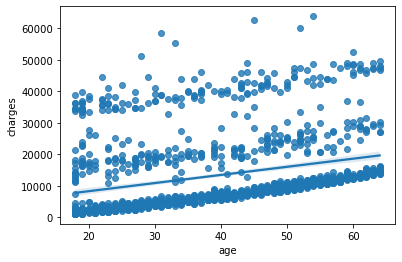

In [6]:
sns.regplot(x='age', y='charges', data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

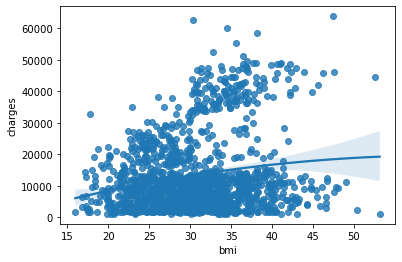

In [7]:
sns.regplot(x='bmi', y='charges', data=df,order=2)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

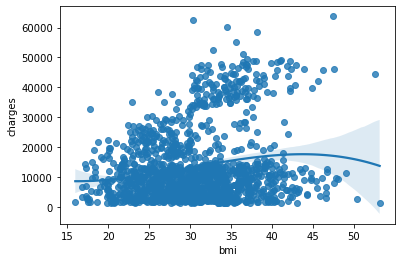

In [8]:
sns.regplot(x='bmi', y='charges', data=df,order=3)

In [9]:
x = df['bmi'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)


In [11]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
x_ = pf.fit_transform(x)
x_test_ = pf.fit_transform(x_test)

In [12]:

poly = LinearRegression()
poly.fit(x_, y)
poly.coef_

array([[ 0.00000000e+00, -1.85889719e+03,  7.84798449e+01,
        -8.72660110e-01]])

In [13]:
#defining prediction data frame 
predictions = poly.predict(x_test_)
     

### apply polyminal regression

In [14]:
print('Coefficients:', poly.coef_)
print('Intercept:', poly.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = poly.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [[ 0.00000000e+00 -1.85889719e+03  7.84798449e+01 -8.72660110e-01]]
Intercept: [21762.89388383]
MAE: 9162.52131423828
MSE: 141321664.72116184
RMSE: 11887.878899162872
AccuracyII: 2.298947753463376 %


### apply Linear regression

In [16]:

linreg = LinearRegression()
linreg.fit(x_train, y_train)

predictionsLN = linreg.predict(x_test)

print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictionsLN))
print('MSE:', metrics.mean_squared_error(y_test, predictionsLN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsLN)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [[406.48537763]]
Intercept: [1045.27369365]
MAE: 9224.043606677247
MSE: 141140704.53527808
RMSE: 11880.265339430685
AccuracyII: 2.4240524259172114 %


MAE: 10325.632911842455
MSE: 185430136.72723097
RMSE: 13617.273468915537
AccuracyII: -28.19491981088149 %


/tmp/ipykernel_120699/1366041436.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)
